# Comenzamos el analisis de los datos
## Para esto comenzaremos el codigo importando los elementos necesarios y abriendo el archivo con la base de datos que se va a utilizar.


In [1]:
import numpy as np   # Importamos librerias de calculo
import pandas as pd  # Importamos librerias de uso de tablas o los dataframes
import seaborn as sns # Importamos librerias de graficos
%matplotlib inline 
import matplotlib.pyplot as plt

df = pd.read_csv("Dataset Relevamiento.csv")  # Asi leemos el archivo que esta en la carpeta y mostramos a las 4 primeras filas
df.head (4)

,ID,provincia,departamento,localidad,nombre_barrio,otros_nombres_barrio,tipo_de_barrio,cantidad_de_familias,anio_creo_barrio,luz,...,alcantarillado,asfalto,alumbrado,recoleccion_de_residuos,organizaciones_externas,mayores_problemas_barrio1,cosas_que_mas_le_gustan1,poligono,IDENTIFICAR,anio
0,TE_000001,BUENOS AIRES,TIGRE,CHASICÓ,el ahorcado,NaN,VILLA,190,1975.0,RED PÚBLICA CON MEDIDORES DOMICILIARIOS. (CADA...,...,NO,NO,"SI, PROVISTOS POR EL ESTADO.","SI, DE MANERA FORMAL. (EL CAMIÓN INGRESA AL BA...",NO,DROGA/ALCOHOL/TABACO,OTRO,"-58.59945100000001,-34.405688 -58.600438,-34.4...",CUMPLE CON LA DEFINICIÓN,2016
1,TE_000008,NEUQUÉN,CONFLUENCIA,NEUQUÉN,nueva esperanza,dentro de villa ceferino,ASENTAMIENTO,30,1990.0,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,...,NO,NO,NO,NO,SÍ,FALTA DE ACCESO A LOS SERVICIOS,UNIÓN Y FAMILIARIDAD ENTRE VECINOS,"-68.09599718832222,-38.94101958422372 -68.0956...",CUMPLE CON LA DEFINICIÓN,2016
2,TE_000009,NEUQUÉN,CONFLUENCIA,NEUQUÉN,loteo social 1,toma norte,ASENTAMIENTO,30,2007.0,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,...,NO,NO,NO,NO,NO,INSEGURIDAD/DELINCUENCIA,UNIÓN Y FAMILIARIDAD ENTRE VECINOS,"-68.11663400000001,-38.929042 -68.117119,-38.9...",CUMPLE CON LA DEFINICIÓN,2016
3,TE_000013,NEUQUÉN,CONFLUENCIA,NEUQUÉN,toma alto godoy,no tiene,ASENTAMIENTO,70,1990.0,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,...,NO,NO,"SI, PROVISTOS POR EL ESTADO.","SI, DE MANERA FORMAL. (EL CAMIÓN INGRESA AL BA...",NO,DROGA/ALCOHOL/TABACO,TRANQUILIDAD,"-68.11655008297473,-38.93412118363295 -68.1163...",CUMPLE CON LA DEFINICIÓN,2016


In [2]:
df.describe () # Muestra estadistica basica del dataframe

,cantidad_de_familias,anio_creo_barrio,anio
count,2597.000000,2461.000000,2597.0
mean,266.507894,1987.847623,2016.0
std,630.088406,21.551054,0.0
min,3.000000,1888.000000,2016.0
25%,40.000000,1975.000000,2016.0
50%,100.000000,1991.000000,2016.0
75%,270.000000,2006.000000,2016.0
max,13000.000000,2015.000000,2016.0


In [3]:
df.describe (include = "all") # Muestra estadisticas de valores que no son numericos

,ID,provincia,departamento,localidad,nombre_barrio,otros_nombres_barrio,tipo_de_barrio,cantidad_de_familias,anio_creo_barrio,luz,...,alcantarillado,asfalto,alumbrado,recoleccion_de_residuos,organizaciones_externas,mayores_problemas_barrio1,cosas_que_mas_le_gustan1,poligono,IDENTIFICAR,anio
count,2597,2597,2597,2589,2596,662,2288,2597.000000,2461.000000,2574,...,2150,2141,2153,2156,2130,2140,2121,2568,2597,2597.0
unique,2597,11,113,357,2360,620,6,NaN,NaN,6,...,5,4,5,4,5,10,9,2564,3,NaN
top,TE_001209,BUENOS AIRES,CAPITAL,CÓRDOBA CAPITAL,San Cayetano,-,ASENTAMIENTO,NaN,NaN,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,...,NO,NO,"SI, PROVISTOS POR EL ESTADO.","SI, DE MANERA FORMAL. (EL CAMIÓN INGRESA AL BA...",NO,FALTA DE ACCESO A LOS SERVICIOS,TRANQUILIDAD,0,CUMPLE CON LA DEFINICIÓN,NaN
freq,1,1440,400,126,12,10,1703,NaN,NaN,1575,...,1575,1457,1165,1340,1536,703,984,5,2438,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266.507894,1987.847623,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,630.088406,21.551054,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,1888.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,1975.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,1991.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270.000000,2006.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0


In [4]:
df.info()   # Muestra que tipo de variables hay en el dataframe mas otra información adicional

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597 entries, 0 to 2596
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         2597 non-null   object 
 1   provincia                  2597 non-null   object 
 2   departamento               2597 non-null   object 
 3   localidad                  2589 non-null   object 
 4   nombre_barrio              2596 non-null   object 
 5   otros_nombres_barrio       662 non-null    object 
 6   tipo_de_barrio             2288 non-null   object 
 7   cantidad_de_familias       2597 non-null   int64  
 8   anio_creo_barrio           2461 non-null   float64
 9   luz                        2574 non-null   object 
 10  excretas                   2574 non-null   object 
 11  agua                       2438 non-null   object 
 12  energia_calefaccion        2149 non-null   object 
 13  energia_cocinar            2143 non-null   objec

In [5]:
df.drop(['otros_nombres_barrio', 'IDENTIFICAR', 'cosas_que_mas_le_gustan1'], axis = 'columns', inplace=True) 
# Eliminamos columnas que no vamos a utilizar en el analisis


In [6]:
# Para no perder valores del DF, segun que datos NAN tenga la columna, los transformo en un dato significativo para el analisis
df["tipo_de_barrio"].fillna("VILLA", inplace = True) 
df["nombre_barrio"].fillna("Otro", inplace = True) 
df["pendiente"].fillna("Plano", inplace = True)
df["anio_creo_barrio"].fillna("No sabe", inplace = True)
df["localidad"].fillna("Caba", inplace = True)
df["inundaciones"].fillna("No tuvo", inplace = True)
df["basural"].fillna("No tiene", inplace = True)
df["actividad_agropecuaria"].fillna("No tiene", inplace = True)
df["emergencias_ambulancia"].fillna("No tiene", inplace = True)
df["agua"].fillna("No tiene", inplace = True)
df["relleno_sanitario"].fillna("No tiene", inplace = True)
df["camino_de_alto_trafico"].fillna("No tiene", inplace = True)
df["desechos_industriales"].fillna("No sabe", inplace = True)
df["plantacion_forestal"].fillna("No sabe", inplace = True)
df["sala_medica"].fillna("No tiene", inplace = True)
df["emergencias_bomberos"].fillna("No tiene", inplace = True)
df["ribera_rio"].fillna("No tiene", inplace = True)
df["comisaria"].fillna("No tiene", inplace = True)
df["torres_de_alta_tension"].fillna("No tiene", inplace = True)
df["linea_de_tren"].fillna("No tiene", inplace = True)
df["organizaciones_externas"].fillna("No tiene", inplace = True)

In [7]:
df

,ID,provincia,departamento,localidad,nombre_barrio,tipo_de_barrio,cantidad_de_familias,anio_creo_barrio,luz,excretas,...,plaza,centro_de_deportes,alcantarillado,asfalto,alumbrado,recoleccion_de_residuos,organizaciones_externas,mayores_problemas_barrio1,poligono,anio
0,TE_000001,BUENOS AIRES,TIGRE,CHASICÓ,el ahorcado,VILLA,190,1975.0,RED PÚBLICA CON MEDIDORES DOMICILIARIOS. (CADA...,"DESAGÜE SÓLO A POZO NEGRO / CIEGO U HOYO, EXCA...",...,A MENOS DE 10 CUADRAS (1 KM),ENTRE 11 Y 30 CUADRAS(1 Y 3 KM),NO,NO,"SI, PROVISTOS POR EL ESTADO.","SI, DE MANERA FORMAL. (EL CAMIÓN INGRESA AL BA...",NO,DROGA/ALCOHOL/TABACO,"-58.59945100000001,-34.405688 -58.600438,-34.4...",2016
1,TE_000008,NEUQUÉN,CONFLUENCIA,NEUQUÉN,nueva esperanza,ASENTAMIENTO,30,1990.0,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,"RED CLOACAL PÚBLICA CONECTADA AL PLUVIAL, AL D...",...,A MENOS DE 10 CUADRAS (1 KM),ENTRE 11 Y 30 CUADRAS(1 Y 3 KM),NO,NO,NO,NO,SÍ,FALTA DE ACCESO A LOS SERVICIOS,"-68.09599718832222,-38.94101958422372 -68.0956...",2016
2,TE_000009,NEUQUÉN,CONFLUENCIA,NEUQUÉN,loteo social 1,ASENTAMIENTO,30,2007.0,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,"DESAGÜE SÓLO A POZO NEGRO / CIEGO U HOYO, EXCA...",...,A MENOS DE 10 CUADRAS (1 KM),MÁS DE 50 CUADRAS(+5 KM),NO,NO,NO,NO,NO,INSEGURIDAD/DELINCUENCIA,"-68.11663400000001,-38.929042 -68.117119,-38.9...",2016
3,TE_000013,NEUQUÉN,CONFLUENCIA,NEUQUÉN,toma alto godoy,ASENTAMIENTO,70,1990.0,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,DESAGÜE A CÁMARA SÉPTICA Y POZO CIEGO,...,A MENOS DE 10 CUADRAS (1 KM),ENTRE 31 Y 50 CUADRAS(3 Y 5 KM),NO,NO,"SI, PROVISTOS POR EL ESTADO.","SI, DE MANERA FORMAL. (EL CAMIÓN INGRESA AL BA...",NO,DROGA/ALCOHOL/TABACO,"-68.11655008297473,-38.93412118363295 -68.1163...",2016
4,TE_000020,NEUQUÉN,CONFLUENCIA,NEUQUÉN,Auka Mahuida,ASENTAMIENTO,150,2004.0,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,DESAGÜE A CÁMARA SÉPTICA Y POZO CIEGO,...,ENTRE 11 Y 30 CUADRAS(1 Y 3 KM),A MENOS DE 10 CUADRAS (1 KM),NO,NO,NO,NO,NO,OTRO,"-68.07649248356904,-38.9414112252755 -68.07682...",2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2592,TE_004332,BUENOS AIRES,SAN NICOLAS,RÍO TALA,12/03/2016,ASENTAMIENTO,20,No sabe,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,"DESAGÜE SÓLO A POZO NEGRO / CIEGO U HOYO, EXCA...",...,NaN,NaN,NaN,NaN,NaN,NaN,No tiene,NaN,0,2016
2593,TE_004333,BUENOS AIRES,ARRECIFES,ARRECIFES (CABECERA PDO.),lavalle,ASENTAMIENTO,25,No sabe,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,"DESAGÜE SÓLO A POZO NEGRO / CIEGO U HOYO, EXCA...",...,NaN,NaN,NaN,NaN,NaN,NaN,No tiene,NaN,"-60.11637086009928,-34.06829519373805 -60.1161...",2016
2594,TE_004334,BUENOS AIRES,ARRECIFES,ARRECIFES (CABECERA PDO.),tucan y escalada,ASENTAMIENTO,30,No sabe,RED PÚBLICA CON MEDIDORES DOMICILIARIOS. (CADA...,"DESAGÜE SÓLO A POZO NEGRO / CIEGO U HOYO, EXCA...",...,NaN,NaN,NaN,NaN,NaN,NaN,No tiene,NaN,"-60.1207924,-34.0649966 -60.1214147,-34.065885...",2016
2595,TE_004335,BUENOS AIRES,BRAGADO,BRAGADO (CABECERA PDO.),hermanos islas,ASENTAMIENTO,10,No sabe,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,"DESAGÜE SÓLO A POZO NEGRO / CIEGO U HOYO, EXCA...",...,NaN,NaN,NaN,NaN,NaN,NaN,No tiene,NaN,"-60.4987211494109,-35.10716108684236 -60.49969...",2016


In [8]:
df.info()   # Volvemos a pasar el codigo para controlar los cambios en el DF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597 entries, 0 to 2596
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         2597 non-null   object
 1   provincia                  2597 non-null   object
 2   departamento               2597 non-null   object
 3   localidad                  2597 non-null   object
 4   nombre_barrio              2597 non-null   object
 5   tipo_de_barrio             2597 non-null   object
 6   cantidad_de_familias       2597 non-null   int64 
 7   anio_creo_barrio           2597 non-null   object
 8   luz                        2574 non-null   object
 9   excretas                   2574 non-null   object
 10  agua                       2597 non-null   object
 11  energia_calefaccion        2149 non-null   object
 12  energia_cocinar            2143 non-null   object
 13  emergencias_policia        2148 non-null   object
 14  emergenc

In [9]:
df.dropna()

,ID,provincia,departamento,localidad,nombre_barrio,tipo_de_barrio,cantidad_de_familias,anio_creo_barrio,luz,excretas,...,plaza,centro_de_deportes,alcantarillado,asfalto,alumbrado,recoleccion_de_residuos,organizaciones_externas,mayores_problemas_barrio1,poligono,anio
0,TE_000001,BUENOS AIRES,TIGRE,CHASICÓ,el ahorcado,VILLA,190,1975.0,RED PÚBLICA CON MEDIDORES DOMICILIARIOS. (CADA...,"DESAGÜE SÓLO A POZO NEGRO / CIEGO U HOYO, EXCA...",...,A MENOS DE 10 CUADRAS (1 KM),ENTRE 11 Y 30 CUADRAS(1 Y 3 KM),NO,NO,"SI, PROVISTOS POR EL ESTADO.","SI, DE MANERA FORMAL. (EL CAMIÓN INGRESA AL BA...",NO,DROGA/ALCOHOL/TABACO,"-58.59945100000001,-34.405688 -58.600438,-34.4...",2016
1,TE_000008,NEUQUÉN,CONFLUENCIA,NEUQUÉN,nueva esperanza,ASENTAMIENTO,30,1990.0,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,"RED CLOACAL PÚBLICA CONECTADA AL PLUVIAL, AL D...",...,A MENOS DE 10 CUADRAS (1 KM),ENTRE 11 Y 30 CUADRAS(1 Y 3 KM),NO,NO,NO,NO,SÍ,FALTA DE ACCESO A LOS SERVICIOS,"-68.09599718832222,-38.94101958422372 -68.0956...",2016
2,TE_000009,NEUQUÉN,CONFLUENCIA,NEUQUÉN,loteo social 1,ASENTAMIENTO,30,2007.0,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,"DESAGÜE SÓLO A POZO NEGRO / CIEGO U HOYO, EXCA...",...,A MENOS DE 10 CUADRAS (1 KM),MÁS DE 50 CUADRAS(+5 KM),NO,NO,NO,NO,NO,INSEGURIDAD/DELINCUENCIA,"-68.11663400000001,-38.929042 -68.117119,-38.9...",2016
3,TE_000013,NEUQUÉN,CONFLUENCIA,NEUQUÉN,toma alto godoy,ASENTAMIENTO,70,1990.0,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,DESAGÜE A CÁMARA SÉPTICA Y POZO CIEGO,...,A MENOS DE 10 CUADRAS (1 KM),ENTRE 31 Y 50 CUADRAS(3 Y 5 KM),NO,NO,"SI, PROVISTOS POR EL ESTADO.","SI, DE MANERA FORMAL. (EL CAMIÓN INGRESA AL BA...",NO,DROGA/ALCOHOL/TABACO,"-68.11655008297473,-38.93412118363295 -68.1163...",2016
4,TE_000020,NEUQUÉN,CONFLUENCIA,NEUQUÉN,Auka Mahuida,ASENTAMIENTO,150,2004.0,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,DESAGÜE A CÁMARA SÉPTICA Y POZO CIEGO,...,ENTRE 11 Y 30 CUADRAS(1 Y 3 KM),A MENOS DE 10 CUADRAS (1 KM),NO,NO,NO,NO,NO,OTRO,"-68.07649248356904,-38.9414112252755 -68.07682...",2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,TE_004081,TUCUMÁN,CAPITAL,SAN MIGUEL DE TUCUMÁN,nueva esperanza,ASENTAMIENTO,250,2012.0,RED PÚBLICA CON MEDIDORES DOMICILIARIOS. (CADA...,"DESAGÜE SÓLO A POZO NEGRO / CIEGO U HOYO, EXCA...",...,ENTRE 11 Y 30 CUADRAS(1 Y 3 KM),ENTRE 11 Y 30 CUADRAS(1 Y 3 KM),NO,NO,"SI, PROVISTOS POR EL ESTADO.","SI, DE MANERA FORMAL. (EL CAMIÓN INGRESA AL BA...",SÍ,OTRO,"-65.22797778495792,-26.88922766953107 -65.2273...",2016
2372,TE_004082,TUCUMÁN,CAPITAL,SAN MIGUEL DE TUCUMÁN,barrio la gaceta,ASENTAMIENTO DE FORMA PLANIFICADA CON PARTICIP...,100,1945.0,RED PÚBLICA CON MEDIDORES DOMICILIARIOS. (CADA...,"DESAGÜE SÓLO A POZO NEGRO / CIEGO U HOYO, EXCA...",...,A MENOS DE 10 CUADRAS (1 KM),MÁS DE 50 CUADRAS(+5 KM),NO,NO,"SI, PROVISTOS POR EL ESTADO.",NO,NO,INSEGURIDAD/DELINCUENCIA,"-65.16406783921376,-26.81880324752548 -65.1641...",2016
2405,TE_004123,TUCUMÁN,CAPITAL,SAN MIGUEL DE TUCUMÁN,Villa 9 de Julio,ASENTAMIENTO,150,1971.0,RED PÚBLICA CON MEDIDORES DOMICILIARIOS. (CADA...,DESAGÜE A CÁMARA SÉPTICA Y POZO CIEGO,...,A MENOS DE 10 CUADRAS (1 KM),NO SABE / NO RESPONDE,NO,NO,"SI, PROVISTOS POR EL ESTADO.","SI, DE MANERA FORMAL. (EL CAMIÓN INGRESA AL BA...",SÍ,INSEGURIDAD/DELINCUENCIA,"-65.17767910000001,-26.81221710000001 -65.1769...",2016
2406,TE_004124,TUCUMÁN,CAPITAL,SAN MIGUEL DE TUCUMÁN,Canal Norte,ASENTAMIENTO,30,1960.0,RED PÚBLICA CON MEDIDORES DOMICILIARIOS. (CADA...,DESAGÜE A CÁMARA SÉPTICA Y POZO CIEGO,...,A MENOS DE 10 CUADRAS (1 KM),MÁS DE 50 CUADRAS(+5 KM),NO,NO,"SI, HECHOS POR LOS VECINOS.",NO,NO,INSEGURIDAD/DELINCUENCIA,"-65.2108200213157,-26.79142068881948 -65.21064...",2016


In [10]:
# Para ver la cantidad de valores que podemos encontrar en una columna determinada.
df.tipo_de_barrio.value_counts()

ASENTAMIENTO                                                                      1703
VILLA                                                                              773
ASENTAMIENTO DE FORMA PLANIFICADA CON PARTICIPACIÓN DEL ESTADO (LOTEO SOCIAL).      94
VILLA DE FORMA PLANIFICADA CON PARTICIPACIÓN DEL ESTADO (LOTEO SOCIAL).             25
villa                                                                                1
Asentamiento                                                                         1
Name: tipo_de_barrio, dtype: int64

In [11]:
# Reemplazamos valores con texto muy largos por otros similares para simplificar el analisis
df.tipo_de_barrio = df.tipo_de_barrio.replace(["ASENTAMIENTO DE FORMA PLANIFICADA CON PARTICIPACIÓN DEL ESTADO (LOTEO SOCIAL).", "Asentamiento"], "ASENTAMIENTO")
df.tipo_de_barrio = df.tipo_de_barrio.replace(["VILLA DE FORMA PLANIFICADA CON PARTICIPACIÓN DEL ESTADO (LOTEO SOCIAL).", "villa"], "VILLA")

In [12]:
df.tipo_de_barrio.value_counts() # Volvemos a pasar el codigo para ver los cambios en la columna

ASENTAMIENTO    1798
VILLA            799
Name: tipo_de_barrio, dtype: int64

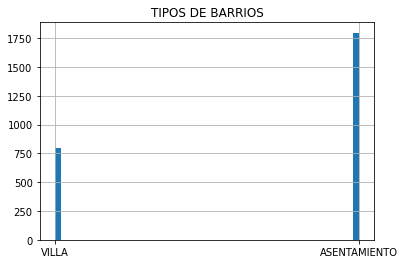

<Figure size 432x288 with 0 Axes>

In [13]:
df['tipo_de_barrio'].hist(bins=50) # Vemos graficamente a su distribución
plt.title('TIPOS DE BARRIOS')
plt.grid(True)
plt.show()
plt.clf()


## Repetimos el procedimiento con la columna "luz", "alumbrado" y "asfalto" para obtener valores numericos

In [14]:
df.luz.value_counts() # Para ver la cantidad de valores en esta columna.

CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHADOS A LA RED, CABLES A LOS POSTES DE LUZ DE LA CALLE, DE UNA FAMILIA A OTRA, ETC)                                   1575
RED PÚBLICA CON MEDIDORES DOMICILIARIOS. (CADA FAMILIA CON SU FACTURA, CON SU PROPIO MEDIDOR)                                                                      798
RED PÚBLICA CON MEDIDOR COMUNITARIO / SOCIAL. (NO HAY FACTURAS INDIVIDUALES, NO HAY UN MEDIDOR POR FAMILIA, SINO UNO O VARIOS MEDIDORES PARA MUCHAS FAMILIAS).     143
OTRO                                                                                                                                                                51
NO TIENE                                                                                                                                                             6
Conexión Irregular a la Red Pública. (Enganchados a la Red, Cables a los Postes de Luz de la Calle, de una Familia a Otra, Etc)                                      

In [15]:
# Reemplazamos valores muy largos por otros similares para simplificar
df.luz = df.luz.replace(["CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHADOS A LA RED, CABLES A LOS POSTES DE LUZ DE LA CALLE, DE UNA FAMILIA A OTRA, ETC)", "Conexión Irregular a la Red Pública. (Enganchados a la Red, Cables a los Postes de Luz de la Calle, de una Familia a Otra, Etc)"], "ENGANCHADOS")
df.luz = df.luz.replace(["RED PÚBLICA CON MEDIDORES DOMICILIARIOS. (CADA FAMILIA CON SU FACTURA, CON SU PROPIO MEDIDOR)", "RED PÚBLICA CON MEDIDOR COMUNITARIO / SOCIAL. (NO HAY FACTURAS INDIVIDUALES, NO HAY UN MEDIDOR POR FAMILIA, SINO UNO O VARIOS MEDIDORES PARA MUCHAS FAMILIAS)."], "RED PUBLICA")

In [16]:
df.luz.value_counts() # Para ver la cantidad de valores que quedaron en esta columna

ENGANCHADOS    1576
RED PUBLICA     941
OTRO             51
NO TIENE          6
Name: luz, dtype: int64

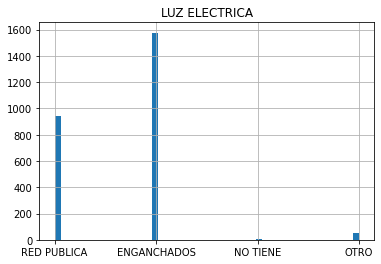

<Figure size 432x288 with 0 Axes>

In [17]:
df['luz'].hist(bins=50) # Vemos graficamente su distribución
plt.title('LUZ ELECTRICA')
plt.grid(True)
plt.show()
plt.clf()

In [18]:
df.alumbrado.value_counts() # Para ver la cantidad de valores en una columna determinada.

SI, PROVISTOS POR EL ESTADO.    1165
NO                               648
SI, HECHOS POR LOS VECINOS.      334
NO SABE / NO RESPONDE              5
Si, Provistos por el Estado.       1
Name: alumbrado, dtype: int64

In [19]:
# Reemplazamos valores muy largos por otros similares para simplificar
df.alumbrado = df.alumbrado.replace(["SI, PROVISTOS POR EL ESTADO.", "SI, HECHOS POR LOS VECINOS.", "Si, Provistos por el Estado."], "SI")
df.alumbrado = df.alumbrado.replace(["NO SABE / NO RESPONDE"], "NO")

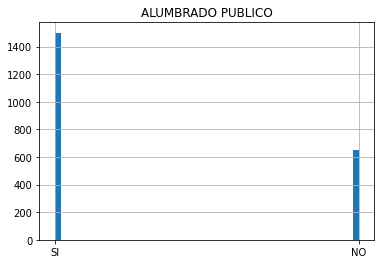

<Figure size 432x288 with 0 Axes>

In [20]:
df['alumbrado'].hist(bins=50) # Vemos graficamente a su distribución del alumbrado
plt.title('ALUMBRADO PUBLICO')
plt.grid(True)
plt.show()
plt.clf()

In [21]:
df.alumbrado.value_counts() # Para ver la cantidad de valores en una columna determinada.

SI    1500
NO     653
Name: alumbrado, dtype: int64

In [22]:
df.asfalto.value_counts() # Para ver la cantidad de valores en una columna determinada.

NO                       1457
SÍ                        681
NO SABE / NO RESPONDE       2
Si                          1
Name: asfalto, dtype: int64

In [23]:
df.asfalto = df.asfalto.replace(["NO SABE / NO RESPONDE"], "NO")
df.asfalto = df.asfalto.replace(["Si"], "SÍ")

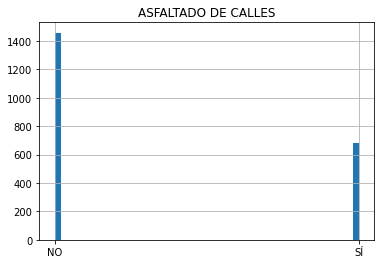

<Figure size 432x288 with 0 Axes>

In [24]:
df['asfalto'].hist(bins=50) # Vemos graficamente a su distribución del asfalto
plt.title('ASFALTADO DE CALLES')
plt.grid(True)
plt.show()
plt.clf()

In [25]:
df.asfalto.value_counts() # Para ver la cantidad de valores en una columna determinada.

NO    1459
SÍ     682
Name: asfalto, dtype: int64

In [26]:
# Eliminamos las demas columnas que no voy a utilizar en el analisis, lo anterior fue para practicar el manejo de los datos
df.drop("departamento", axis = 1, inplace=True)
df.drop("excretas", axis = 1, inplace=True)
df.drop("agua", axis = 1, inplace=True)
df.drop("poligono", axis = 1, inplace=True)
df.drop("anio", axis = 1, inplace=True)
df.drop("ID", axis = 1, inplace=True)
df.drop("localidad", axis = 1, inplace=True)
df.drop("energia_calefaccion", axis = 1, inplace=True)
df.drop("energia_cocinar", axis = 1, inplace=True)
df.drop("emergencias_policia", axis = 1, inplace=True)
df.drop("ribera_rio", axis = 1, inplace=True)
df.drop("pendiente", axis = 1, inplace=True)
df.drop("organizaciones_externas", axis = 1, inplace=True)
df.drop("mayores_problemas_barrio1", axis = 1, inplace=True)
df.drop("plantacion_forestal", axis = 1, inplace=True)
df.drop("emergencias_bomberos", axis = 1, inplace=True)
df.drop("emergencias_ambulancia", axis = 1, inplace=True)
df.drop("nombre_barrio", axis = 1, inplace=True)
df.drop("linea_de_tren", axis = 1, inplace=True)
df.drop("basural", axis = 1, inplace=True)
df.drop("torres_de_alta_tension", axis = 1, inplace=True)
df.drop("camino_de_alto_trafico", axis = 1, inplace=True)
df.drop("desechos_industriales", axis = 1, inplace=True)
df.drop("actividad_agropecuaria", axis = 1, inplace=True)
df.drop("relleno_sanitario", axis = 1, inplace=True)
df.drop("inundaciones", axis = 1, inplace=True)
df.drop("alcantarillado", axis = 1, inplace=True)
df.drop("recoleccion_de_residuos", axis = 1, inplace=True)
df.drop("jardin_de_infantes", axis = 1, inplace=True)
df.drop("escuela_primaria", axis = 1, inplace=True)
df.drop("escuela_secundaria", axis = 1, inplace=True)
df.drop("hospital", axis = 1, inplace=True)
df.drop("sala_medica", axis = 1, inplace=True)
df.drop("comisaria", axis = 1, inplace=True)
df.drop("parada_transporte_publico", axis = 1, inplace=True)
df.drop("plaza", axis = 1, inplace=True)
df.drop("centro_de_deportes", axis = 1, inplace=True)

df
# Las siguientes columnas contando desde la 6ta columna pertenecen a NO SÍ (ASFALTO), NO SI (ALUMBRADO), ENG|NO TIENE, ETC (LUZ)

,provincia,tipo_de_barrio,cantidad_de_familias,anio_creo_barrio,luz,asfalto,alumbrado
0,BUENOS AIRES,VILLA,190,1975.0,RED PUBLICA,NO,SI
1,NEUQUÉN,ASENTAMIENTO,30,1990.0,ENGANCHADOS,NO,NO
2,NEUQUÉN,ASENTAMIENTO,30,2007.0,ENGANCHADOS,NO,NO
3,NEUQUÉN,ASENTAMIENTO,70,1990.0,ENGANCHADOS,NO,SI
4,NEUQUÉN,ASENTAMIENTO,150,2004.0,ENGANCHADOS,NO,NO
...,...,...,...,...,...,...,...
2592,BUENOS AIRES,ASENTAMIENTO,20,No sabe,ENGANCHADOS,NaN,NaN
2593,BUENOS AIRES,ASENTAMIENTO,25,No sabe,ENGANCHADOS,NaN,NaN
2594,BUENOS AIRES,ASENTAMIENTO,30,No sabe,RED PUBLICA,NaN,NaN
2595,BUENOS AIRES,ASENTAMIENTO,10,No sabe,ENGANCHADOS,NaN,NaN


In [27]:
#Procedemos a analizar la informacion

df.describe()

,cantidad_de_familias
count,2597.000000
mean,266.507894
std,630.088406
min,3.000000
25%,40.000000
50%,100.000000
75%,270.000000
max,13000.000000


## Luego de procesar el dataframe continuamos aplicando predicciones

In [28]:
# Vamos a ver la relación entre las villas y asentamientos y sus problemas cotidianos.

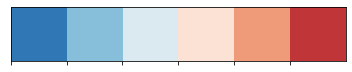

In [29]:
#Definimos la paleta de colores que usaremos en los graficos siguientes
sns.palplot(sns.color_palette('RdBu_r'))

Text(0.5, 1.0, 'Cantidad de Familias con Alumbrado por Provincias')

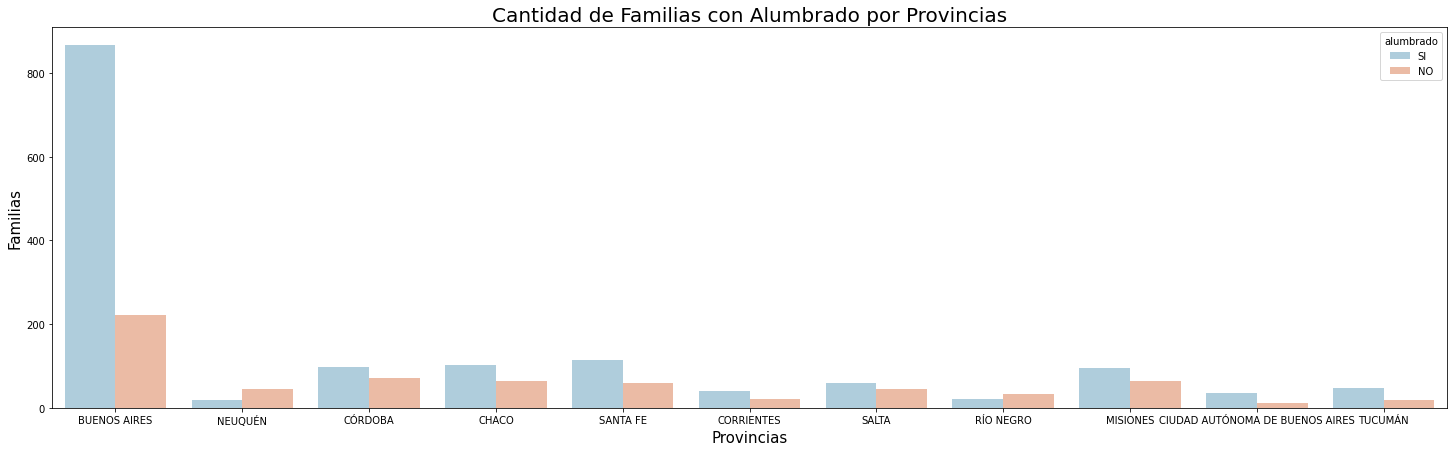

In [30]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 25,7 #Tamaño del grafico
ax=sns.countplot(x="provincia", hue="alumbrado", data=df, palette='RdBu_r') #Graficar y definir el color
ax.set_xlabel("Provincias", fontsize = 15) #Texto en el eje X
ax.set_ylabel("Familias", fontsize = 15) #Texto en el eje Y
ax.set_title("Cantidad de Familias con Alumbrado por Provincias", fontsize = 20) #Texto del titulo

Text(0.5, 1.0, 'Cantidad de Familias con Asfalto por Provincias')

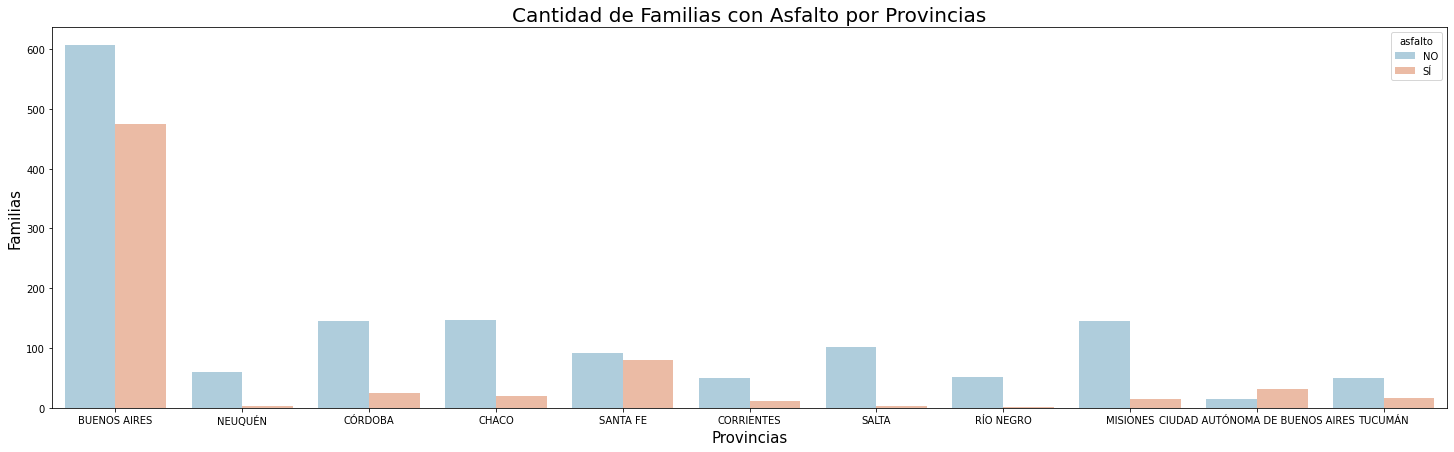

In [31]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 25,7
ax=sns.countplot(x="provincia", hue="asfalto", data=df, palette='RdBu_r')
ax.set_xlabel("Provincias", fontsize = 15) #Texto en el eje X
ax.set_ylabel("Familias", fontsize = 15) #Texto en el eje Y
ax.set_title("Cantidad de Familias con Asfalto por Provincias", fontsize = 20) #Texto del titulo

Text(0.5, 1.0, 'Cantidad de Familias que viven en Villa o Asentamientos separado por Provincias')

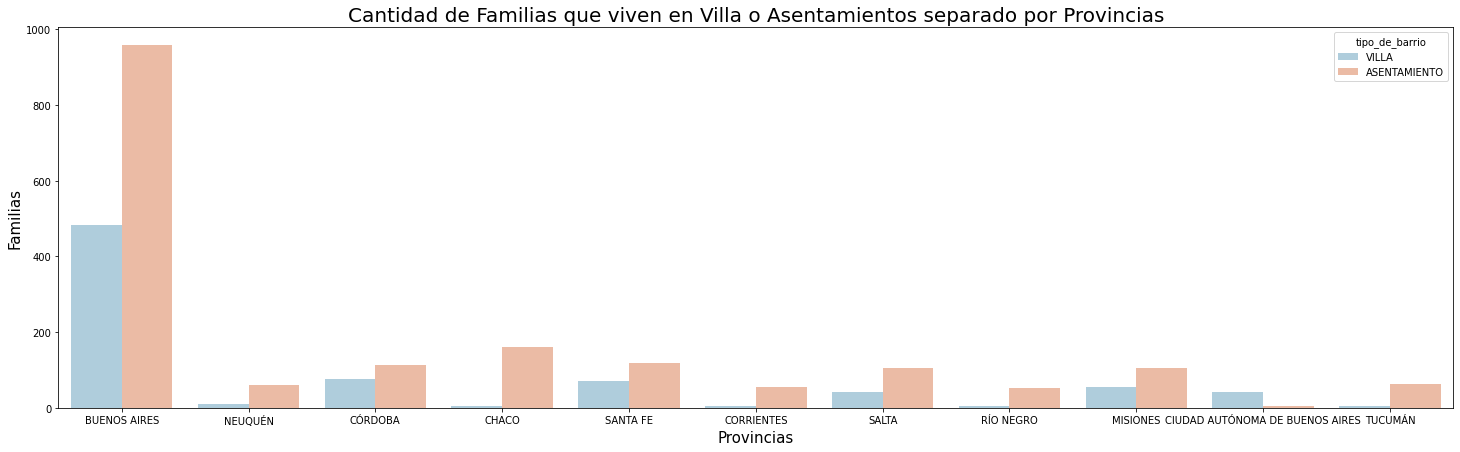

In [32]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 25,7
ax=sns.countplot(x="provincia", hue="tipo_de_barrio", data=df, palette='RdBu_r')
ax.set_xlabel("Provincias", fontsize = 15) #Texto en el eje X
ax.set_ylabel("Familias", fontsize = 15) #Texto en el eje Y
ax.set_title("Cantidad de Familias que viven en Villa o Asentamientos separado por Provincias", fontsize = 20) #Texto del titulo

In [33]:
from scipy import stats

In [34]:
pearson_coef, p_value = stats.pearsonr(df['cantidad_de_familias'], df['alumbrado'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [ ]:
lm = LinearRegression() # Definimos que es LM 
lm

In [ ]:
X = df[['ENGANCHADOS']] # Definimos las variables en este caso el predictor
Y = df['cantidad_de_familias'] # Definimos el target

In [ ]:
lm.fit(X,Y)

In [ ]:
Yhat=lm.predict(X) # Pedimos una prediccion como resultado
Yhat[0:5]   

In [ ]:
lm.intercept_ #Intercepcion con el eje Y

In [ ]:
lm.coef_ # La pendiente de la predicción

In [ ]:
# CANTIDAD DE FAMILIAS = 290.5631 - 39.6393 x Enganchados

In [ ]:
# Graficando la regresión
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="RED PUBLICA", y="cantidad_de_familias", data=df)
plt.ylim(0,)

In [ ]:
# Visualizamos rápidamente las caraterísticas de entrada
df.drop(['NO'],1).hist()
plt.show()

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score